Button(button_style='primary', description='Submit', style=ButtonStyle())

Output()

Installing rcsb-api: 1.80kB [00:03, 472B/s]
Installing selenium: 2.46kB [00:05, 430B/s]
Updating package lists: 1.81kB [00:05, 340B/s]
Installing Microsoft Edge: 707B [00:20, 34.3B/s]
Resolving dependencies: 3.35kB [00:10, 308B/s]
Unzipping WebDriver: 188B [00:00, 547B/s] 
Installing Edge WebDriver: 0.00B [00:00, ?B/s]



Retriving entries from the PDB...

Step 1 (~12 sec): 
Retrieved 19 entries from the Protein Data Bank
Custom report saved as 'custom_report_batch_1.csv'
100 unique accession codes found

Step 2 (~25 sec):
Accession codes successfully converted to Ensembl ID. File saved as 'accession_code_batch_1.txt'
Ensembl ID txt files successfully combined. File saved as 'Combined Codes.txt'

Step 3 (~10 sec): 
Ensembl IDs successfully appended to file
Unique gene list created. There are a total of 96 unique Ensembl IDs

Step 4 (~15 sec): 
Consenus Path DB database succesfully saved as 'CPDB_pathways_genes.tab'
Consenus Path DB tab file successfully converted to csv file
90 genes from the Ensembl ID list are identifiable by CPDB
87 genes from the Ensembl ID list are present in at least one CPDB pathway
2721 genes identifiable by Ensembl ID and present in at least one CPDB pathway

Step 5 (~8 sec): 
P and Q values from overrepresentation analysis successfully appended to file
P and Q values successf

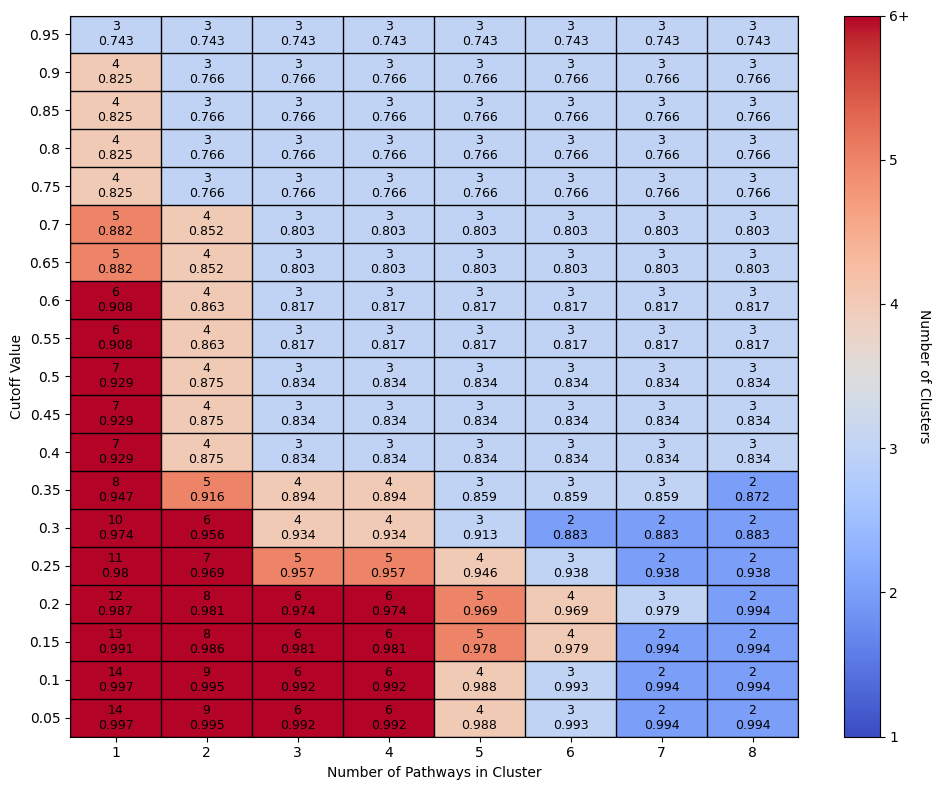

Data successfully written to 'Cluster_Analysis_Saccharomyces cerevisiae_["ADENOSINE-5'-TRIPHOSPHATE", 'ZINC ION'].csv'

To download a specific set, start the next code block


In [ ]:
#*** MAIN PROGRAM ***#

### USER INTERFACE ###


import ipywidgets as widgets  # For interactive UI controls in Jupyter notebooks
from IPython.display import display, clear_output  # To display content and handle outputs

# User specified values
source_organism = ""
polymer_type = []
cofactor_name = []
threshold_q_value = 0.0
download_pdb_file = False
download_unique_list = False
download_filtered_overrep = False
download_final_cluster_analysis = True

# Initalize values for GUI
polymer_options = ["Protein", "DNA", "RNA", "NA-hybrid", "Other"]
polymer_entries = []
polymer_entries_container = widgets.VBox([])  # Container to dynamically display the appropriate widget

cofactor_options = ["ADENOSINE-5'-TRIPHOSPHATE", "ADENOSINE-5'-DIPHOSPHATE", "ADENOSINE-5'-MONOPHOSPHATE", "ALUMINUM FLUORIDE",
             "BARIUM ION", "BERYLLIUM", "BERYLLIUM TRIFLUORIDE ION", "BISMUTH(III) ION", "CADMIUM ION", "CALCIUM ION", "CESIUM ION", "CHROMIUM ION", "COBALT (II) ION",
             "COBALT (III) ION", "COPPER (I) ION", "COPPER (II) ION", "FE (II) ION", "FE (III) ION", "FLAVIN-ADENINE DINUCLEOTIDE", "GALLIUM (III) ION", "GOLD ION", "GUANOSINE-5'-TRIPHOSPHATE",
             "GUANOSINE-5'-DIPHOSPHATE", "GUANOSINE-5'-MONOPHOSPHATE", "INDIUM (III) ION", "IRIDIUM ION", "IRIDIUM (III) ION", "IRIDIUM HEXAMMINE ION", "IRON/SULFUR CLUSTER", "LEAD (II) ION", "LITHIUM ION",
             "MAGNESIUM ION", "MANGANESE (II) ION", "MANGANESE (III) ION", "MERCURY (II) IODIDE", "MERCURY (II) ION", "MOLYBDATE ION", "NICKEL (II) ION", "NICOTINAMIDE-ADENINE-DINUCLEOTIDE",
             "OSMIUM ION", "OSMIUM 4+ ION", "OSMIUM (III) HEXAMMINE", "PALLADIUM ION", "PLATINUM (II) ION", "POTASSIUM ION", "RHENIUM", "RUBIDIUM ION", "RUTHENIUM ION", "RUTHENIUM OCTASPORINE 4",
             "RUTHENIUM PYRIDOCARBAZOLE", "SILVER ION", "SODIUM ION", "STRONTIUM ION", "THALLIUM (I) ION", "TITANIUM ION", "TUNGSTATE(VI)ION", "TUNGSTEN ION", "VANADATE ION", "YTTERBIUM (III) ION",
             "YTTRIUM (III) ION", "ZINC ION", "ZIRCONIUM ION"]
cofactor_entries = []
cofactor_entries_container = widgets.VBox([])  # Container to dynamically display the appropriate widget

# Define Dropdown Widgets + Options
dropdown_organism = widgets.Dropdown(
    options=["Homo sapiens (human)", "Mus musculus (mouse)", "Saccharomyces cerevisiae (yeast)"],
    value="Homo sapiens (human)",  # Default value
)

add_button_p = widgets.Button(
    description="Add Polymer Entity",
    button_style="success"
)

remove_button_p = widgets.Button(
    description="Remove Polymer Entity",
    button_style="danger",
    disbaled=True  # Cannot remove the first cofactor, must enter at least one
)

and_or_button_p = widgets.Button(
    description="AND/OR Button",
    button_style="",
    disabled=True  # Doesn't apply until more than one cofactor
)

add_button_c = widgets.Button(
    description="Add Cofactor",
    button_style="success"
)

remove_button_c = widgets.Button(
    description="Remove Cofactor",
    button_style="danger",
    disbaled=True  # Cannot remove the first cofactor, must enter at least one
)

and_or_button_c = widgets.Button(
    description="AND/OR Button",
    button_style="",
    disabled=True  # Doesn't apply until more than one cofactor
)

# Define Float Input Widget
float_q_value_input = widgets.FloatText(
    value=0.05,
)

# Define True/False Dropdown Widgets
TF_PDB_file = widgets.Dropdown(
  options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=True,  # Default value
)

TF_unique_list = widgets.Dropdown(
    options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=True,  # Default value
)

TF_filtered_overrep = widgets.Dropdown(
    options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=True,  # Default value
)

TF_final_cluster_analysis = widgets.Dropdown(
    options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=True,  # Default value
)

# Define Submit Button
submit_button = widgets.Button(
    description="Submit",
    button_style="primary", # Button style
)

add_remove_widgets_p = widgets.HBox([add_button_p, remove_button_p, and_or_button_p])
add_remove_widgets_c = widgets.HBox([add_button_c, remove_button_c, and_or_button_c])

# Create Labels (Ensuring Descriptions are Fully Visible)
label1 = widgets.Label("Select source organism:")
label2 = widgets.Label("Enter threshold q-value:")
label3 = widgets.Label("Download PDB entries file:")
label4 = widgets.Label("Download unique Ensembl gene list:")
label5 = widgets.Label("Download filtered overrepresentation analysis:")
label6 = widgets.Label("Download final cluster analysis:")

# Use HBox to Align Labels and Widgets
row1 = widgets.HBox([label1, dropdown_organism])
row2 = widgets.HBox([label2, float_q_value_input])
row3 = widgets.HBox([label3, TF_PDB_file])
row4 = widgets.HBox([label4, TF_unique_list])
row5 = widgets.HBox([label5, TF_filtered_overrep])
row6 = widgets.HBox([label6, TF_final_cluster_analysis])

# Output Display
output = widgets.Output()

# Enable remove + and/or button if more than one cofactor
def update_button_state():
  remove_button_c.disabled = len(cofactor_entries) <= 1
  and_or_button_c.disabled = len(cofactor_entries) <= 1

  add_button_p.disabled = len(polymer_entries) >= 5
  remove_button_p.disabled = len(polymer_entries) <= 1
  and_or_button_p.disabled = len(polymer_entries) <= 1

# Function to create a polymer entry
def create_polymer_entry(index, removable=True):
  # Create dropdown widget
  dropdown_polymer = widgets.Dropdown(
      options=polymer_options,
      value="Protein",
      description=f"Polymer {index}:",
      layout=widgets.Layout(width='390px'),
  )

  # Container that holds all parts of this entry
  entry_box = widgets.HBox([dropdown_polymer])

  polymer_entries.append((entry_box, dropdown_polymer, removable))
  polymer_entries_container.children += (entry_box,)  # Adds the entry to the visible GUI

  update_button_state()

# Function to create a cofactor entry
def create_cofactor_entry(index, removable=True):
  # Create the two toggle buttons for selection
  select_co_buttons = widgets.ToggleButtons(
      options=['Dropdown', 'Custom'],
      description=f"Cofactor {index}:",
      button_style='info',
      value=None
  )

  # Create dropdown widget
  dropdown_cofactor = widgets.Dropdown(
      options=cofactor_options,
      value="ADENOSINE-5'-TRIPHOSPHATE",
      description="Select:",
      layout=widgets.Layout(width='400px'),
      visible=False  # Hidden by default
  )

  # Create the text box widget
  custom_cofactor_widget = widgets.Text(
      placeholder='Type cofactor name exactly as it appears in PDB...',
      description="Enter:",
      layout=widgets.Layout(width='400px'),
      visible=False  # Hidden by default
  )

  # Container that holds all parts of this entry
  entry_box = widgets.HBox([select_co_buttons])

  # Function to show either the dropdown or textbox based on button selection
  def toggle_input(change):
      widgets_to_show = [select_co_buttons]
      selection = change['new']

      if selection == 'Dropdown':
          dropdown_cofactor.visible = True
          custom_cofactor_widget.visible = False
          widgets_to_show.append(dropdown_cofactor)
      elif selection == 'Custom':
          dropdown_cofactor.visible = False
          custom_cofactor_widget.visible = True
          widgets_to_show.append(custom_cofactor_widget)
      else:
          dropdown_cofactor.visible = False
          custom_cofactor_widget.visible = False

      entry_box.children = widgets_to_show

  # Attach event listener to the selection buttons
  select_co_buttons.observe(toggle_input, names='value')

  cofactor_entries.append((entry_box, select_co_buttons, dropdown_cofactor, custom_cofactor_widget, removable))
  cofactor_entries_container.children += (entry_box,)  # Adds the entry to the visible GUI

  update_button_state()

# Function to add polymer entry
def add_polymer_entry(b):
  create_polymer_entry(len(polymer_entries) + 1)
  update_button_state()

# Function to add cofactor entry
def add_cofactor_entry(b):
  create_cofactor_entry(len(cofactor_entries) + 1)

# Function to remove polymer entry, ensuring at least one remains
def remove_polymer_entry(b):
  if len(polymer_entries) > 1:
    last_entry, _, _ = polymer_entries.pop()
    polymer_entries_container.children = polymer_entries_container.children[:-1]

  update_button_state()

# Function to remove cofactor entry, ensuring at least one remains
def remove_cofactor_entry(b):
  if len(cofactor_entries) > 1:
    last_entry, _, _, _, _ = cofactor_entries.pop()
    cofactor_entries_container.children = cofactor_entries_container.children[:-1]

  update_button_state()

# Function to update and/or operator
def and_or_click(b):
  if b.description == "AND":
    b.description = "OR"
  else:
    b.description = "AND"

# Function to run program after submit button clicked
def on_button_click(b):  # Run code after user inputs submitted
    global source_organism, polymer_type, cofactor_name, threshold_q_value, download_pdb_file, download_unique_list, download_filtered_overrep, download_final_cluster_analysis, filtered_P_and_Q_file

    with output:
        output.clear_output()  # Clear previous output

        # Assign source organism dropdown value to variable
        if "Homo sapiens (human)" in dropdown_organism.value:
          source_organism = "Homo sapiens"
        elif "Mus musculus (mouse)" in dropdown_organism.value:
          source_organism = "Mus musculus"
        elif "Saccharomyces cerevisiae (yeast)" in dropdown_organism.value:
          source_organism = "Saccharomyces cerevisiae"

        # Assign input values to polymer entity
        for idx, (entry_box, dropdown, _) in enumerate(polymer_entries, start=1):
            polymer = dropdown.value

            if len(polymer_entries) <= 1:
              operator_p = None
            elif and_or_button_p.description == "AND/OR Button" and len(polymer_entries) > 1:
              operator_p = None
              print("Please select an operator for your polymer entities by pressing the AND/OR Button.")
              return
            else:
              operator_p = and_or_button_p.description

            polymer_type.append(polymer)

        # Assign input values to cofactor name
        for idx, (entry_box, toggle, dropdown, custom, _) in enumerate(cofactor_entries, start=1):
            if toggle.value is None:
                print(f"Please select Dropdown or Custom for Cofactor {idx}.")
                return

            if toggle.value == "Dropdown":
                cofactor = dropdown.value
            elif toggle.value == "Custom":
                cofactor = custom.value.strip()

            if not cofactor:
                print(f"Please enter or select a cofactor name for Cofactor {idx}.")
                return

            if len(cofactor_entries) <= 1:
              operator_c = None
            elif and_or_button_c.description == "AND/OR Button" and len(cofactor_entries) > 1:
              operator_c = None
              print("Please select an operator for your cofactor names by pressing the AND/OR Button.")
              return
            else:
              operator_c = and_or_button_c.description

            cofactor_name.append(cofactor)

        if float_q_value_input.value <= 0:
          threshold_q_value = 0.05
        else:
          threshold_q_value = float_q_value_input.value

        download_pdb_file = TF_PDB_file.value
        download_unique_list = TF_unique_list.value
        download_filtered_overrep = TF_filtered_overrep.value
        download_final_cluster_analysis = TF_final_cluster_analysis.value

        # Print retrieved values
        print(f"\nSource organism: {source_organism}")
        print(f"Polymer entity type: {polymer_type}")
        print(f"Polymer operator: {operator_p}")
        print(f"Cofactor: {cofactor_name}")
        print(f"Cofactor operator: {operator_c}")
        print(f"Threshold q-value: {threshold_q_value}")
        print(f"Download PDB entries file: {download_pdb_file}")
        print(f"Download unique Ensembl gene list: {download_unique_list}")
        print(f"Download filtered overrepresentation analysis: {download_filtered_overrep}")
        print(f"Download final cluster analysis: {download_final_cluster_analysis}\n")

        # Disable buttons after submission
        submit_button.disabled = True

        add_button_c.disabled = True
        remove_button_c.disabled = True
        and_or_button_c.disabled = True

        add_button_p.disabled = True
        remove_button_p.disabled = True
        and_or_button_p.disabled = True

    ### PACKAGE INSTALLATIONS ###


    import os
    import subprocess
    import sys
    import time
    from tqdm import tqdm

    # Function to check if a package is installed
    def is_package_installed(package):
        try:
            subprocess.run([sys.executable, "-m", "pip", "show", package], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=True)  # Supresses standard output and error messages
            return True
        except subprocess.CalledProcessError:
            return False

    # Function to install a package with a progress bar
    def install_package(package):
        if not is_package_installed(package):
            with tqdm(desc=f"Installing {package}", ascii=True, ncols=80, unit="B", unit_scale=True) as progress:  # Sets up the progress bar
                process = subprocess.Popen(
                    [sys.executable, "-m", "pip", "install", package],  # Runs pip install for the package
                    stdout=subprocess.PIPE,  # Captures standard output
                    stderr=subprocess.STDOUT,  # Redirects errors to stdout
                    text=True,   # Ensures output is treated as a text stream
                    bufsize=1  # Get updates instead of waiting for the process to finish
                )

                for line in process.stdout:
                    progress.update(len(line))  # Update the progress bar

                process.wait()  # Blocks execution until package installed
                progress.close()  # Closes the progress bar

    # Install required packages
    install_package("rcsb-api")
    install_package("selenium")

    # Function to check if a command is available
    def is_command_available(command):
        return subprocess.call(["which", command], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL) == 0

    # Function to run a command with a progress bar
    def run_command_with_progress(command, desc):
        with tqdm(desc=desc, ascii=True, ncols=80, unit="B", unit_scale=True) as progress:
            process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1)  # Runs the command

            for line in process.stdout:
                progress.update(len(line))  # Update the progress bar

            process.wait()  # Blocks execution until the command is complete
            progress.close()  # Closes the progress bar

    # Install Microsoft Edge browser if not installed
    edge_version = "133.0.3065.82-1"
    edge_deb = f"microsoft-edge-stable_{edge_version}_amd64.deb"

    if not is_command_available("microsoft-edge"):
        run_command_with_progress(["apt-get", "update"], "Updating package lists")
        run_command_with_progress(["wget", f"https://packages.microsoft.com/repos/edge/pool/main/m/microsoft-edge-stable/{edge_deb}"], "Downloading Microsoft Edge")
        run_command_with_progress(["dpkg", "-i", edge_deb], "Installing Microsoft Edge")
        run_command_with_progress(["apt-get", "-f", "install", "-y"], "Resolving dependencies")

    # Install Microsoft Edge WebDriver if not installed
    edge_driver_version = "133.0.3065.82"
    edge_driver_path = "/usr/bin/edgedriver"

    if not os.path.exists(edge_driver_path):
        run_command_with_progress(["wget", f"https://msedgedriver.azureedge.net/{edge_driver_version}/edgedriver_linux64.zip"], "Downloading Edge WebDriver")
        run_command_with_progress(["unzip", "edgedriver_linux64.zip"], "Unzipping WebDriver")
        run_command_with_progress(["mv", "msedgedriver", edge_driver_path], "Installing Edge WebDriver")


    # Import necessary modules
    from rcsbapi.search import search_attributes as attrs  # To search the PDB
    import requests  # To send requests to interact with web APIs
    import json  # To parse and format JSON data
    import pandas as pd  # To use data structures for data analysis and manipulation
    import csv  # To handle csv files
    from google.colab import files  # For file upload and download in Colab
    # To automate web page interactions
    from selenium import webdriver
    from selenium.webdriver.edge.options import Options
    from selenium.webdriver.edge.service import Service as EdgeService
    from selenium.webdriver.common.by import By
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.support.ui import Select
    from selenium.common.exceptions import TimeoutException
    import io  # To handle in-memory text
    import math  # To access mathematical functions
    from scipy.stats import hypergeom  # To calculate p-values for overlap significance
    from statsmodels.stats.multitest import multipletests  # For correcting multiple hypothesis testing (Bonferroni correction)
    import numpy as np  # For numerical operations and matrix manipulations
    from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # For hierarchical clustering and dendrogram visualization
    from scipy.spatial.distance import squareform  # To convert a condensed distance matrix into a square form
    import matplotlib.pyplot as plt  # For creating plots
    from itertools import combinations  # Generates all possible unique pairs of elements
    from collections import Counter  # To count the occurrences of elements in an iterable
    import re  # To extract words from text
    from IPython.display import Image, display

    ### DATA ANALYSIS ###


    ## STEP 1: Curation of Protein List using PDB ##
    print("\nRetriving entries from the PDB...")

    # Construct an RCSB query to search for structures
    query1 = attrs.rcsb_entity_source_organism.scientific_name == source_organism
    query2 = []
    query3 = []

    for polymer in polymer_type:
      query2.append(attrs.entity_poly.rcsb_entity_polymer_type == polymer)

    for cofactor in cofactor_name:
      query3.append(attrs.chem_comp.name == cofactor)

    # Combine all polymers into a single grouped expression
    if query2:  # Make sure query2 isn't empty
        polymer_query = query2[0]
        for polymer in query2[1:]:
            if operator_p == "AND":
                polymer_query = polymer_query & polymer
            else:
                polymer_query = polymer_query | polymer

    # Combine all cofactors into a single grouped expression
    if query3:  # Make sure query3 isn't empty
        cofactor_query = query3[0]
        for cofactor in query3[1:]:
            if operator_c == "AND":
                cofactor_query = cofactor_query & cofactor
            else:
                cofactor_query = cofactor_query | cofactor

        # Now add the whole cofactor group to the main query
        query = query1 & (polymer_query) & (cofactor_query)

    # Execute query and construct a list of the results
    results = list(query())

    # Replace potential characters in cofactor names that cannot be used in file names
    for i in range(len(cofactor_name)):
        cofactor = cofactor_name[i]
        cofactor = cofactor.replace("/", "_").replace("\\", "_").replace("*", "_").replace(":", "_")
        cofactor_name[i] = cofactor

    # The maximum number of structures to be processed at one time
    batch_size = 5000
    # Store file names
    generated_files = []

    step1_seconds = (math.ceil(len(results)/batch_size))*12
    print(f"\nStep 1 (~{step1_seconds} sec): \nRetrieved {len(results)} entries from the Protein Data Bank")

    if len(results) == 0:
      print("\nERROR: The program has exited as this combination of queries returns 0 results. Try selecting different values")
      return

    # Function to save the entry ID, PDB ID, macromolecule name, gene name, and accession code(s) of each returned entry
    def fetch_and_save_batch(batch, batch_index):
        formatted_string = ", ".join(f'"{entry}"' for entry in batch)  # Properly formatting the entries in each batch

        # GraphQL query provided by RCSB
        graphql_query = f"""
        {{
          entries(entry_ids: [{formatted_string}]) {{
            rcsb_id
            rcsb_entry_container_identifiers {{
              entry_id
            }}
            polymer_entities {{
              rcsb_entity_source_organism {{
                rcsb_gene_name {{
                  value
                }}
              }}
              rcsb_polymer_entity {{
                rcsb_macromolecular_names_combined {{
                  name
                }}
              }}
              rcsb_polymer_entity_container_identifiers {{
                reference_sequence_identifiers {{
                  database_accession
                }}
              }}
            }}
          }}
        }}
        """

        # GraphQL endpoint
        url_RCSB = "https://data.rcsb.org/graphql"

        # Send the request with the GraphQL query
        response = requests.post(
            url_RCSB,
            json={"query": graphql_query},
            headers={"Content-Type": "application/json"}
        )

        # Check if the request was successful (status code = 200)
        if response.status_code == 200:
            data = response.json()

            # Extract relevant data from the response
            report_data = []
            for entry in data['data']['entries']:
                pdb_id = entry.get('rcsb_id', "")  # Store the entries PDB ID
                entry_ids = entry.get('rcsb_entry_container_identifiers', {}).get('entry_id', "")  # Store the entries entry ID

                if 'polymer_entities' in entry and entry['polymer_entities']:
                    for polymer_entity in entry['polymer_entities']:
                        gene_names = []
                        macromolecules = []
                        codes = []

                        # Extract gene names as a 2D list, one sublist for each organism
                        if 'rcsb_entity_source_organism' in polymer_entity and polymer_entity['rcsb_entity_source_organism']:
                            gene_names = [[gene['value'] for gene in organism['rcsb_gene_name']]
                                          if 'rcsb_gene_name' in organism and organism['rcsb_gene_name'] else [""]
                                          for organism in polymer_entity['rcsb_entity_source_organism']]
                        if not gene_names:
                            gene_names = [[""]]  # Store a blank entry

                        # Extract macromolecule names for entry
                        if 'rcsb_polymer_entity' in polymer_entity and polymer_entity['rcsb_polymer_entity']:
                            organism = polymer_entity['rcsb_polymer_entity']
                            if 'rcsb_macromolecular_names_combined' in organism and organism['rcsb_macromolecular_names_combined']:
                                macromolecules = [gene['name'] for gene in organism['rcsb_macromolecular_names_combined']]
                        if not macromolecules:
                            macromolecules = [""]  # Store a blank entry

                        # Extract accession codes for entry
                        if 'rcsb_polymer_entity_container_identifiers' in polymer_entity and polymer_entity['rcsb_polymer_entity_container_identifiers']:
                            organism = polymer_entity['rcsb_polymer_entity_container_identifiers']
                            if 'reference_sequence_identifiers' in organism and organism['reference_sequence_identifiers']:
                                codes = [gene['database_accession'] for gene in organism['reference_sequence_identifiers']]
                        if not codes:
                            codes = [""]  # Store a blank entry

                        # Generate rows for each organism's gene set
                        for gene_set in gene_names:
                            report_data.append({
                                'Entry ID': entry_ids,
                                'PDB ID': pdb_id,
                                'Gene Name': ', '.join(gene_set),
                                'Macromolecule Name': ', '.join(macromolecules),
                                'Accession Code(s)': ', '.join(codes)
                            })

            # Convert the extracted data into a DataFrame and save as CSV
            df = pd.DataFrame(report_data)
            filename = f"custom_report_batch_{batch_index}.csv"
            df.to_csv(filename, index=False)
            generated_files.append(filename)
            print(f"Custom report saved as '{filename}'")
        # Timeout error making the request
        elif response.status_code == 540:
          print(f"Timeout error encountered when accessing {url_RCSB}. Please try running the program again.")
          print(response.status_code, response.text)
          sys.exit()  # Force program to exit
        # Error making the request
        else:
            print(f"Error accessing {url_RCSB}:", response.status_code, response.text)
            sys.exit()  # Force program to exit

    # Process entries in batches so as not to lose any data
    for i in range(0, len(results), batch_size):
        batch = results[i:i+batch_size]
        fetch_and_save_batch(batch, i // batch_size + 1)  # Function call

    # Function to combine all saved CSV files containing structure information into one
    def combine_csv_files(output_path):
      # If multiple files were generated, combine them
      if len(generated_files) > 1:
        combined_rows = []
        headers_written = False

        for file_name in generated_files:
          with open(file_name, 'r', newline='') as file:
            csv_reader = csv.reader(file)
            headers = next(csv_reader)

            # Write the header once
            if not headers_written:
                    combined_rows.append(headers)
                    headers_written = True

            for row in csv_reader:
              combined_rows.append(row)

        # Write the combined data to a new CSV file
        with open(output_path, 'w', newline='') as output_csv:
          csv_writer = csv.writer(output_csv)
          csv_writer.writerows(combined_rows)

        # Download file if requested
        if download_pdb_file == True:
          files.download(output_path)

        print(f"Combined custom reports saved as '{output_path}'")
        return output_path

      # If only one file was generated, download it
      else:
        if download_pdb_file == True:
          files.download(generated_files[0])
        return generated_files[0]

    # Function to extract the unique accession codes from the combined file
    def accession_code_set(file_path):
      code_list = set()

      with open(file_path, "r", newline='') as file:
        csv_reader = csv.reader(file)
        headers = next(csv_reader)

        for row in csv_reader:
          if len(row) >= 5:
            entries = row[4].split(',')

            for entry in entries:
              if entry and entry.strip():
                code_list.add(entry.strip())

      print(f"{len(code_list)} unique accession codes found")
      return code_list

    # File path
    combined_report = "Combined_custom_report.csv"

    # Function calls
    combined_pdb_file = combine_csv_files(combined_report)
    accessionCodes_set = accession_code_set(combined_pdb_file)


    ## STEP 2: Convert Accession Codes to Ensembl IDs and Save ##

    # Maximum number of accession codes to process at one time
    batch_size_codes = 500
    # Store file names
    generated_codes = []

    # Convert set of accession codes to a list
    accessionCodes_list = [item for item in accessionCodes_set]

    step2_seconds = (math.ceil(len(accessionCodes_set)/batch_size_codes))*25
    print(f"\nStep 2 (~{step2_seconds} sec):")

    # Function to convert accession codes to their Ensembl IDs using DAVID
    def fetch_converted_codes(batch, batch_index):
      formatted_codes = ", ".join(entry for entry in batch)  # Properly format the accession codes for the API

      '''# Define API endpoint
      url_DAVID = f"https://davidbioinformatics.nih.gov/api.jsp?type=UNIPROT_ACCESSION&ids={formatted_codes}&tool=conversion"

      # Make GET request
      response = requests.get(url_DAVID)'''

      url_DAVID = f"https://davidbioinformatics.nih.gov/conversion.jsp"

      # Make GET request
      response = requests.get(url_DAVID)

      # Check if the request was successful (status code = 200)
      if response.status_code == 200:
          # Define options for how Selenium will access the website
          options = Options()
          options.add_argument("--headless")  # Run in headless mode (no UI)
          options.add_argument("--disable-gpu")  # For Linux compatibility
          options.add_argument("--no-sandbox")  # Needed in Colab
          options.add_argument("--disable-dev-shm-usage")  # Prevents memory issues

          # Specify the executable path and create the Edge Webdriver instance
          edge_service = EdgeService(executable_path='/usr/bin/edgedriver')
          driver = webdriver.Edge(service=edge_service, options=options)
          driver.get(url_DAVID)

          # Upload the accession code list into the correct box
          list_box = driver.find_element(By.ID, "LISTBox")
          list_box.send_keys(formatted_codes)

          # Select Uniprot Accession as its current ID type
          id_dropdown = driver.find_element(By.NAME, "Identifier")
          select = Select(id_dropdown)
          select.select_by_value("UNIPROT_ACCESSION")

          # Select gene list as the type of upload list
          gene_button = driver.find_element(By.NAME, "rbUploadType")
          gene_button.click()

          # Submit the list
          submit_list = driver.find_element(By.NAME, "B52")
          submit_list.click()

          # Handle pop-up alert if present
          try:
              WebDriverWait(driver, 3).until(EC.alert_is_present())  # Wait for alert
              alert = driver.switch_to.alert
              alert.accept()
          except:
              pass

          # Navigate back to the gene ID conversion tool
          tool_dropdown = driver.find_element(By.XPATH, '//a[@id="navbarDropdown" and normalize-space(text())="Shortcut to DAVID Tools"]')
          tool_dropdown.click()
          conversion_tool = driver.find_element(By.XPATH, '//a[@href="conversion.jsp"]')
          conversion_tool.click()

          # Select Ensembl ID as the type to be converted to
          type_box = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.NAME, "convertTo")))
          select = Select(type_box)
          select.select_by_value("ENSEMBL_GENE_ID")

          # Identify the species search box
          species_search_box = driver.find_element(By.NAME, "convertSpeciesSelect")
          species_search_box.send_keys(source_organism)  # Type in the organism name

          # Wait for the species name to appear in the dropdown and click it
          suggestion = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, f"//div[contains(@class, 'tt-suggestion') and text()='{source_organism}']")))
          suggestion.click()

          # Identify the submit button and click it
          submit_conversion = driver.find_element(By.NAME, "Submit")
          submit_conversion.click()

          # Get all open window handles
          all_tabs = driver.window_handles
          # Switch to the newly opened tab with the converted Ensembl IDs
          driver.switch_to.window(all_tabs[-1])

          # Identify the download button and click it
          try:
              download_button = WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.LINK_TEXT, "Download File")))
              download_button.click()
          except TimeoutException:
              print("\nERROR: The program has exited as no download button has been found. It is likely that 0 IDs have been converted. Try selecting different values")
              driver.quit()  # Ensures the browser closes properly if needed
              sys.exit()  # Force program to exit

          # Get the href attribute of the download file (the URL of the text file)
          download_url = download_button.get_attribute('href')

          # Download the text file using requests
          response = requests.get(download_url)

          # Save the content to a .txt file
          filename = f"accession_code_batch_{batch_index}.txt"
          with open(filename, "w", encoding="utf-8") as file:
              file.write(response.text)

          generated_codes.append(filename)
          print(f"Accession codes successfully converted to Ensembl ID. File saved as '{filename}'")

          # Close the Selenium driver
          driver.quit()
      # Error accessing the request
      else:
          print(f"Error accessing {url_DAVID}:", response.status_code, response.text)
          sys.exit()  # Force program to exit

    # Process entries in batches so as not to lose data
    for i in range(0, len(accessionCodes_list), batch_size_codes):
        batch = accessionCodes_list[i:i+batch_size_codes]
        fetch_converted_codes(batch, i // batch_size_codes + 1)  # Function call

    # Function to combine all saved TXT files continaing Ensembl IDs into one
    def combine_txt_files(output_path):
        headers_written = False

        with open(output_path, "w", encoding="utf-8") as outfile:
            for txt_file_path in generated_codes:
                # Open the file and read its contents
                with open(txt_file_path, "r", encoding="utf-8") as txt_file:
                    txt_reader = csv.reader(txt_file, delimiter='\t')  # Specify tab-separated file

                    for row_index, row in enumerate(txt_reader):
                      if row_index == 0:
                        # Write header once
                        if not headers_written:
                          outfile.write('\t'.join(row) + '\n')
                          headers_written = True
                      else:
                        outfile.write('\t'.join(row) + '\n')  # Write the content to one TXT file

        print(f"Ensembl ID txt files successfully combined. File saved as '{output_path}'")
        return output_path

    # File path
    combined_codes = "Combined Codes.txt"

    # Function calls
    Converted_Acc_Codes = combine_txt_files(combined_codes)


    ## STEP 3: Create Unique Gene List ##

    # Function to separate the accession codes in the 4th column of the CSV file
    def separate_codes(file_path):
        all_rows = []

        # Read the input CSV file
        with open(file_path, "r", newline='', encoding='utf-8') as file:
            reader = csv.reader(file)

            # Write the header
            header = next(reader)
            all_rows.append(header)

            # Iterate through each row
            for row in reader:
                if len(row) > 4:  # Ensure the row has at least 4 columns
                    # Split the 4th column at the commas
                    entries = row[4].split(",")

                    # Write a new row for each spliced entry
                    for entry in entries:
                        new_row = row[:4] + [entry.strip()] + row[5:]
                        all_rows.append(new_row)

        # Overwrite the original file with the updated data
        with open(file_path, "w", newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerows(all_rows)

    # Function to update the CSV file with the Ensembl IDs from the TXT file
    def update_csv_with_txt(csv_file_path, txt_file_path):
        txt_data = {}

        # Load data from the TXT file into a dictionary
        with open(txt_file_path, "r", encoding='utf-8') as txt_file:
            txt_reader = csv.reader(txt_file, delimiter='\t')  # Specify tab-separated file
            for row in txt_reader:
                if len(row) >= 2:
                    key = row[0].strip()
                    value = row[1].strip()
                    if key in txt_data:
                        txt_data[key].append(value)
                    else:
                        txt_data[key] = [value]

        # Read and update the CSV file
        updated_rows = []
        with open(csv_file_path, "r", encoding='utf-8') as csv_file:
            csv_reader = csv.reader(csv_file)
            headers = next(csv_reader)
            headers.append("Ensembl ID(s)")
            updated_rows.append(headers)

            for row in csv_reader:
                if len(row) >= 5 and row[4].strip():
                    matching_key = row[4].strip()
                    if matching_key in txt_data:
                        # Append the new data as a new column
                        row.append(', '.join(txt_data[matching_key]))
                    else:
                        # Append an empty string if no match is found
                        row.append('')
                else:
                    # Append an empty string if row doesn't meet the condition
                    row.append('')
                # Append the updated row to the updated_rows array
                updated_rows.append(row)

        # Write updated rows back to the CSV file
        with open(csv_file_path, "w", newline='', encoding='utf-8') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(updated_rows)

        print("\nStep 3 (~10 sec): \nEnsembl IDs successfully appended to file")

    # Function to generate and save the unique Ensembl ID gene list
    def generate_and_save_unique_gene_list(csv_file_path, output_csv_path):
        all_entries = set()

        # Read entries from the CSV file
        with open(csv_file_path, "r", encoding='utf-8') as csv_file:
            csv_reader = csv.reader(csv_file)
            headers = next(csv_reader)

            for row in csv_reader:
              if len(row) >= 5:  # Ensure the row has at least 6 columns
                  # Split entries in the sixth column by commas
                  entries = row[5].split(',')

                  # Process each entry
                  for entry in entries:
                      trimmed_entry = entry.strip()  # Remove spaces before or after entry
                      if trimmed_entry:  # Only add non-empty entries
                        all_entries.add(trimmed_entry)

        # Write unique entries to the output CSV file
        with open(output_csv_path, 'w', newline='', encoding='utf-8') as output_csv:
            csv_writer = csv.writer(output_csv)
            for entry in sorted(all_entries):
                csv_writer.writerow([entry])

        # Download file if requested
        if download_unique_list == True:
          files.download(output_csv_path)

        print(f"Unique gene list created. There are a total of {len(all_entries)} unique Ensembl IDs")
        return all_entries, output_csv_path

    # File path
    output_csv_path = f"/tmp/Unique_Gene_List_{source_organism}_{cofactor_name}.csv"  # Temporary download

    # Function calls
    separate_codes(combined_pdb_file)
    update_csv_with_txt(combined_pdb_file, combined_codes)
    ensembl_id_list, ensembl_id_file = generate_and_save_unique_gene_list(combined_pdb_file, output_csv_path)


    ## STEP 4: CPDB Database and Variable Retrieval ##

    # Function to download the appropriate database for each organism from CPDB
    def download_CPDB_pathways(source_organism):
      # Define URL for each source organism
      if "Homo sapiens" in source_organism:
        url_CPDB = "http://cpdb.molgen.mpg.de/CPDB/daccess"
      elif "Mus musculus" in source_organism:
        url_CPDB = "http://cpdb.molgen.mpg.de/MCPDB/daccess"
      elif "Saccharomyces cerevisiae" in source_organism:
        url_CPDB = "http://cpdb.molgen.mpg.de/YCPDB/daccess"

      # Make GET request
      response = requests.get(url_CPDB)

      # Check if the request was successful (status code = 200)
      if response.status_code == 200:
        download_dir = "/tmp"  # Temporary download directory

        # Clear the download directory before starting
        for f in os.listdir(download_dir):
          file_path = os.path.join(download_dir, f)
          try:
              if os.path.isfile(file_path) and not f.lower().endswith(".csv"):  # Don't clear the CSV file from generate_and_save_unique_gene_list
                  os.remove(file_path)
          except Exception as e:
              print(f"Error deleting file {file_path} from temporary download directory: {e}")

        # Define options for how Selenium will access the website
        options = Options()
        options.add_argument("--headless")  # Run in headless mode (no UI)
        options.add_argument("--disable-gpu")  # For Linux compatibility
        options.add_argument("--no-sandbox")  # Needed in Colab
        options.add_argument("--disable-dev-shm-usage")  # Prevents memory issues

        # Set Edge preferences for downloading files automatically
        edge_prefs = {
            "download.default_directory": download_dir,
            "download.prompt_for_download": False,
            "download.directory_upgrade": True,
            "safebrowsing.enabled": True,
        }
        options.add_experimental_option("prefs", edge_prefs)

        # Specify the executable path and create the Edge Webdriver instance
        edge_service = EdgeService(executable_path='/usr/bin/edgedriver')
        driver = webdriver.Edge(service=edge_service, options=options)
        driver.get(url_CPDB)

        # Select Ensembl ID as the gene identifier
        identifier_box = driver.find_element(By.NAME, "idtype")
        select = Select(identifier_box)
        select.select_by_value("ensembl")

        # Wait for the database download button to be identified and click it
        download_button = driver.find_element(By.XPATH, "//span[@class='pseudolink' and contains(text(),'accession numbers')]")
        download_button.click()

        # Wait for the file to download
        time.sleep(5)

        # Check if the file is properly downloaded
        downloaded_files = os.listdir(download_dir)

        # If multiple files exist, filter for the desired file type
        desired_file = [f for f in downloaded_files if f.endswith(".tab")]
        format_desired_file = desired_file
        print(f"\nStep 4 (~15 sec): \nConsenus Path DB database succesfully saved as '{','.join(format_desired_file)}'")

        # Close the browser
        driver.quit()

        return f"/tmp/{desired_file[0]}"
      # Site not available error
      elif response.status_code == 503:
        print(f"Error accessing {url_CPDB} for data download. This site is temporarily unavailable due to maintenance downtime or capacity problems. \nPlease select a different organism or try again later.")
        print(response.status_code, response.text)

      # Other error accessing the request
      else:
          print(f"Error accessing {url_CPDB} for data download:\n", response.status_code, response.text)
          sys.exit()  # Force program to exit

    # Function to convert the .tab CPDB database file to a .csv file
    def tab_file_to_csv(input_file, output_file):
      # Read the tab-delimited .tab file
      df = pd.read_csv(input_file, delimiter='\t')

      # Modify the 'ensembl_ids' column to add a space after each comma
      df['ensembl_ids'] = df['ensembl_ids'].apply(lambda x: ', '.join(x.split(',')) if isinstance(x, str) else x)

      # Write the data to a .csv file
      df.to_csv(output_file, index=False)

      print(f"Consenus Path DB tab file successfully converted to csv file")

    # Function to retrieve the M and N variable needed for the overrepresentation analysis from CPDB
    def retrieve_variable_from_CPDB(source_organism, ensembl_id_file):
      # Define URL for each source organism
      if "Homo sapiens" in source_organism:
        url_CPDB = "http://cpdb.molgen.mpg.de/CPDB/fct_annot"
      elif "Mus musculus" in source_organism:
        url_CPDB = "http://cpdb.molgen.mpg.de/MCPDB/fct_annot"
      elif "Saccharomyces cerevisiae" in source_organism:
        url_CPDB = "http://cpdb.molgen.mpg.de/YCPDB/fct_annot"

      # Make GET request
      response = requests.get(url_CPDB)

      # Check if the request was successful (status code = 200)
      if response.status_code == 200:
          # Define options for how Selenium will access the website
          options = Options()
          options.add_argument("--headless")  # Run in headless mode (no UI)
          options.add_argument("--disable-gpu")  # For Linux compatibility
          options.add_argument("--no-sandbox")  # Needed in Colab
          options.add_argument("--disable-dev-shm-usage")  # Prevents memory issues

          # Specify the executable path and create the Edge Webdriver instance
          edge_service = EdgeService(executable_path='/usr/bin/edgedriver')
          driver = webdriver.Edge(service=edge_service, options=options)
          driver.get(url_CPDB)

          # Identify the button to upload a gene list and upload the unique gene list file
          gene_list_box = driver.find_element(By.NAME, "fh")
          gene_list_box.send_keys(ensembl_id_file)

          # Identify the ID type dropdown and select the "Ensembl gene" option
          type_dropdown = driver.find_element(By.NAME, "idtype")
          select_type = Select(type_dropdown)
          select_type.select_by_value("ensembl")

          # Identify and click the continue button
          continue_button_1 = driver.find_element(By.CLASS_NAME, 'cpdbutton')
          continue_button_1.click()

          # Wait until the checkbox is present
          wait = WebDriverWait(driver, 10)

          # Identify and click the checkbox for a pathway based analysis
          checkbox = wait.until(EC.presence_of_element_located((By.XPATH, "//input[@type='checkbox' and @value='pwy']")))
          checkbox.click()

          # Identify and click the continue button
          continue_button_2 = driver.find_element(By.CLASS_NAME, 'cpdbutton')
          continue_button_2.click()

          try:
            # Wait for the next page to load and find the needed variables
            mapped_entities = wait.until(EC.presence_of_element_located((By.XPATH, '//a[@href="showTranslation" and normalize-space(text())!="mapped entities:" and number(text())=number(text())]')))
            variables = driver.find_elements(By.XPATH, "//b[contains(text(),'')]")  # Extract the numbers from the <b> tag

            # Convert the text to integers
            M_variable = int(variables[0].text)
            N_variable = int(variables[1].text)
            mapped_entities = int(mapped_entities.text)

            print(f"{mapped_entities} genes from the Ensembl ID list are identifiable by CPDB")
            print(f"{M_variable} genes from the Ensembl ID list are present in at least one CPDB pathway")
            print(f"{N_variable} genes identifiable by Ensembl ID and present in at least one CPDB pathway")

            # Close the browser
            driver.quit()

            return M_variable, N_variable
          except:
            print("\nERROR: The program has exited as there are not enough overrepresented pathways to perform hierarchical clustering. Try selecting different values")
            driver.quit()  # Ensures the browser closes properly if needed
            return None, None

      # Error accessing the request
      else:
          print(f"Error accessing {url_CPDB} for data download:", response.status_code, response.text)
          sys.exit()  # Force program to exit

    # File path
    CPDB_database_converted_file = 'CPDB_database_converted_file.csv'

    # Function calls
    CPDB_database_tab_file = download_CPDB_pathways(source_organism)
    tab_file_to_csv(CPDB_database_tab_file, CPDB_database_converted_file)
    M_variable, N_variable = retrieve_variable_from_CPDB(source_organism, ensembl_id_file)

    if M_variable == None and N_variable == None:
      return


    ## STEP 5: Overrepresentation Analysis ##

    # Function to handle duplicate pathway names by appending (#) and to handle gene names matching pathway names by appending "Pathway"
    def handle_duplicate_pathway_names(rows):
        pathway_counts = {}
        updated_rows = []

        # Extract all gene names from column 4
        all_genes = set()
        for row in rows:
            if len(row) > 3:
                all_genes.update(row[3].split(","))  # Collect all gene names

        # Iterate over each row in the input
        for row in rows:
            pathway = row[0]  # Extract the pathway name from the first column

            # If the pathway name matches a gene name, append "Pathway"
            if pathway in all_genes:
                pathway += " Pathway"

            # Ensure unique pathway names
            if pathway in pathway_counts:
                pathway_counts[pathway] += 1
                pathway = f"{pathway} ({pathway_counts[pathway]})"
            else:
                pathway_counts[pathway] = 0

            # Update the pathway name in the row
            row[0] = pathway
            updated_rows.append(row)

        return updated_rows

    # Function to update the CSV file with the P and Q values for each pathway
    def calculate_p_and_q_values(CPDB_database_converted_file, ensembl_id_list, all_P_and_Q, M_variable, N_variable):
        # Read the comparison values (Ensembl ID list) into a set for quick lookup
        comparison_values = set(entry.strip() for entry in ensembl_id_list)  # .strip() to make the search space insensitive

        # Prepare to store rows and p-values
        rows = []
        p_value_array = []

        # Process the input file
        with open(CPDB_database_converted_file, "r") as in_file:
            reader = csv.reader(in_file)

            # Read the header
            header = next(reader)
            if len(header) < 7:
                header += ["Match Percentage", "P-Value", "Q-Value"]  # Add additional header columns

            # Iterate over each row
            for row in reader:
                # Ensure the row has at least 4 columns
                if len(row) > 3:
                    input_values = row[3].split(",") # Comma separate the values

                    # Find matches between input values and comparison values
                    matching_values = [value.strip() for value in input_values if value.strip() in comparison_values]
                    row[3] = ", ".join(matching_values)

                    # Calculate percentage of genes matching between the total genes in the pathway and the genes in the comparison set
                    total_count = len(input_values)
                    matching_count = len(matching_values)
                    match_percentage = (matching_count / total_count * 100) if total_count > 0 else 0

                    # Set the parameters for the hypergeom function
                    N = N_variable  # Total background size (total number of genes identifiable by Ensembl ID and present in at least one ConsensusPathDB pathway)
                    n = total_count  # Total genes in specific pathway
                    M = M_variable  # Mapped entities (genes from the input list present in at least one ConsensusPathDB pathway)
                    x = matching_count  # Matching genes between specific pathway and comparison file

                    # Calculate the p-value
                    p_value = hypergeom.sf(x - 1, N, n, M)   # Tests whether the overlap between the input gene set and the specific pathway is greater than what would be expected by random chance (smaller p value = more statistically significant)

                    # Append match percentage and p-value to the rows of data
                    if len(row) < 6:
                        row += [f"{matching_count}/{total_count} = {match_percentage:.2f}%", f"{p_value:.2e}"]
                    else:
                        row[4] = f"{matching_count}/{total_count} = {match_percentage:.2f}%"
                        row[5] = f"{p_value:.2e}"

                    # Store the row and p-value
                    rows.append(row)
                    p_value_array.append(p_value)
                else:
                    if len(row) < 6:
                        row += ["0.00%", ""]
                    rows.append(row)

        # Function call
        rows = handle_duplicate_pathway_names(rows)

        # Calculate q-values using the Bonferroni correction
        _, q_values, _, _ = multipletests(p_value_array, method="bonferroni")

        # Append the q-values to the rows of data and write the rows to the output file
        with open(all_P_and_Q, "w", newline="") as out_file:
            writer = csv.writer(out_file)
            writer.writerow(header)  # Write header
            for row, q_val in zip(rows, q_values):  # Combines rows and q_values into a single iterator of tuples
                row.append(f"{q_val:.2e}")  # Append q-value
                writer.writerow(row)
        print("\nStep 5 (~8 sec): \nP and Q values from overrepresentation analysis successfully appended to file")

    # Function to filter rows based on a threshold q-value
    def filter_by_q_value(all_P_and_Q, filtered_P_and_Q_file, threshold_q):
        num_rows = 0  # Tracks the number of pathways that are within the threshold

        # Process the input and output files
        with open(all_P_and_Q, "r") as in_file, open(filtered_P_and_Q_file, "w", newline="") as out_file:
            reader = csv.reader(in_file)
            writer = csv.writer(out_file)

            # Write the header
            header = next(reader)
            writer.writerow(header)

            # Filter rows based on q-value threshold
            for row in reader:
                if len(row) > 6 and float(row[6]) <= threshold_q:  # Check if q-value is within threshold
                    num_rows += 1
                    writer.writerow(row)  # If it is, write it to the output file

        print(f"P and Q values successfully filtered by threshold Q value of {threshold_q}")
        print(f"There are {num_rows} pathways with a Q value less than {threshold_q}")

        if num_rows <= 1:
          print("\nERROR: The program has exited as there are not enough overrepresented pathways to perform hierarchical clustering. Try selecting a larger Q-value")
          return True
        else:
          return False

    #  File paths
    all_P_and_Q = "all_P_and_Q.csv"
    filtered_P_and_Q_file = f"filtered_P_and_Q_file_{source_organism}_{cofactor_name}.csv"

    # Function calls
    calculate_p_and_q_values(CPDB_database_converted_file, ensembl_id_list, all_P_and_Q, M_variable, N_variable)
    step5_flag = filter_by_q_value(all_P_and_Q, filtered_P_and_Q_file, threshold_q_value)

    # Exits program if not enough pathways
    if step5_flag:
      return

    # Download file if requested
    if download_filtered_overrep == True:
      files.download(filtered_P_and_Q_file)


    ## STEP 6: Hierarchical Clustering and Cluster Analysis Output ##

    # Function to create the heatmap (based on number of clusters)
    def color_map(num_clusters, compactness):
      # Used to help determine the max value on the scale
      scale_factor = (max(max(sublist) for sublist in num_clusters if sublist)) - (min(min(sublist) for sublist in num_clusters if sublist))

      # Colour range
      max_value = math.ceil(((max(max(sublist) for sublist in num_clusters if sublist))/2) - (scale_factor*0.1))
      if max_value == 1:
        max_value = 2
        num_ticks = 2  # Number of tick marks
      elif max_value <= 5 and max_value > 1:
        num_ticks = 3  # Number of tick marks
      else:
        num_ticks = 6  # Number of tick marks

      # Define the dimensions and data range
      x_labels = range(1, 9)  # X-axis labels from 0 to 8
      y_labels = [round(i * 0.05, 2) for i in range(1, 20)]  # Y-axis labels from 0 to 0.95 in increments of 0.05

      avg_compactness = np.array(compactness) # Array of compactness values
      data = np.array(num_clusters) # Array of num_clusters values
      clipped_data = np.clip(data, 1, max_value)  # Sets any value above the max_value to the max

      # Normalize the data to a range of 0 to 1 for the color mapping
      normalized_data = (clipped_data - 1) / (max_value - 1)

      # Create the figure and axis
      fig, ax = plt.subplots(figsize=(10, 8))

      # Plot the data as a colored grid
      cmap = plt.colormaps.get_cmap('coolwarm')  # Blue to red gradient
      heatmap = ax.imshow(normalized_data, cmap=cmap, origin='lower', aspect='auto', vmin=0, vmax=1)

      # Add text annotations in the cells
      for i in range(data.shape[0]):  # Iterate over rows
          for j in range(data.shape[1]):  # Iterate over columns
            # Combine the number of clusters and the average compactness into one string
            cell_text = f"{int(data[i, j])}\n{avg_compactness[i, j]}"

            # Add the combined text to the heatmap
            ax.text(j, i, cell_text, ha='center', va='center', color='black', fontsize=9)

      # Add color bar to show the scale
      cbar = plt.colorbar(heatmap, ax=ax) # Plot the color bar
      cbar.set_label('Number of Clusters', rotation=270, labelpad=15) # Set color bar ticks to include max_value
      tick_values = np.linspace(1, max_value, num=num_ticks)  # Generate evenly spaced ticks from 1 to max_value
      cbar.set_ticks((tick_values - 1) / (max_value - 1))  # Normalize tick positions to 0-1 scale
      cbar.set_ticklabels([int(tick) if tick != max(tick_values) else f"{int(tick)}+" for tick in tick_values])  # Set tick labels to integer values

      # Set axis labels and title
      ax.set_xticks(range(len(x_labels)))
      ax.set_xticklabels(x_labels)
      ax.set_yticks(range(len(y_labels)))
      ax.set_yticklabels(y_labels)
      ax.set_xlabel('Number of Pathways in Cluster')
      ax.set_ylabel('Cutoff Value')

      # Add grid lines
      ax.set_xticks(np.arange(-0.5, len(x_labels), 1), minor=True)
      ax.set_yticks(np.arange(-0.5, len(y_labels), 1), minor=True)
      ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
      ax.tick_params(which='minor', bottom=False, left=False)

      # Show the plot
      print("Top value in colour map is the number of clusters. The bottom value is the average compactness.")
      plt.tight_layout()
      plt.show()

    # Function to write number of clusters, min number of pathways, cutoff value, average compactness, % pathways, % genes, and cluster labels to the output CSV file
    def write_clusters_to_csv(num_clusters, compactness, output_file, percent_paths, percent_genes, labels):
        x_labels = range(1, 9)  # Min Number of Pathways in Cluster (X-axis)
        y_labels = [round(i * 0.05, 2) for i in range(1, 20)]  # Cutoff Values (Y-axis)

        with open(output_file, mode='w', newline='') as file:
            writer = csv.writer(file)

            # Write header
            writer.writerow(["Number of Clusters", "Min Number of Pathways in Cluster", "Cutoff Value", "Average Compactness"])

            # Iterate through data
            for i, cutoff_value in enumerate(y_labels):
                for j, pathways in enumerate(x_labels):
                    num_cluster_value = num_clusters[i][j]
                    compactness_value = compactness[i][j]

                    writer.writerow([num_cluster_value, pathways, cutoff_value, compactness_value])  # Write values to the output file

        with open(output_file, "r", newline="") as file:
            reader = list(csv.reader(file))

        # Modify header to add new column names if not already present
        if len(reader) > 0:
            header = reader[0]
            header += ["% Pathways", "% Genes", "Cluster Labels"]

        # Update rows with corresponding values
        for i, row in enumerate(reader[1:]):  # Skip header
            if i < len(percent_paths):  # Avoid index errors
                row += [percent_paths[i], percent_genes[i], labels[i]]

        # Write updated content back to the file
        with open(output_file, "w", newline="") as file:
            writer = csv.writer(file)
            writer.writerows(reader)  # Write modified rows back

        print(f"Data successfully written to '{output_file}'")

    # Function to determine how closely related the pathways in a cluster are (1 = very related, 0 = not related)
    def compute_intra_cluster_compactness(clusters, similarity_matrix):
        compactness_scores = {}

        for cluster_label, pathway_indices in clusters.items():
            # Generate all pairs of pathways within the cluster
            pairs = list(combinations(pathway_indices, 2))

            if not pairs:  # Single pathway in the cluster
                compactness_scores[cluster_label] = 1.0  # Max compactness for single element
                continue

            # Compute the total similarity by summing up pairwise similarities within the cluster
            total_similarity = sum(similarity_matrix[i, j] for i, j in pairs)
            # Compute the average similarity (compactness) for this cluster
            compactness_scores[cluster_label] = total_similarity / len(pairs)

        # Calculate overall average compactness across all clusters
        if len(compactness_scores) == 0:
          total_compactness = 0
        else:
          total_compactness = round(sum(compactness_scores.values()) / len(compactness_scores), 3)

        return total_compactness

    # Function to compute similarity between two gene lists
    def compute_similarity(set1, set2):
        intersection = set1.intersection(set2)  # Number of genes matching between the pathways
        union = set1.union(set2)  # Total number of genes in both the pathways (without duplicates)
        return len(intersection) / len(union) if union else 0

    # Function to create a similarity matrix (percentage of genes matching between two pathways) from the CSV file
    def create_similarity_matrix(input_file):
        total_genes = set()

        with open(input_file, "r") as file:
            reader = list(csv.reader(file))
            headers = reader[0]  # First row is the header
            data = reader[1:]  # Exclude the header

            # Extract pathway names and gene sets
            pathway_names = [row[0] for row in data]  # Extracts the pathway names from the first column
            gene_sets = [set(gene.strip() for gene in row[3].split(",")) for row in data]  # Extracts the genes from the 4th column and comma separates them, .strip() makes it space insensitive

            # Initialize similarity matrix
            n = len(data)
            similarity_matrix = np.zeros((n, n))

            # Compute pairwise similarity
            for i in range(n):
                total_genes = total_genes.union(gene_sets[i]) # Extracts all the genes in all pathways (without duplicates)
                for j in range(n):
                    similarity_matrix[i, j] = compute_similarity(gene_sets[i], gene_sets[j])  # Function call

            print("\nStep 6 (~15 sec): \nSimilarity matrix created")
            return similarity_matrix, pathway_names, total_genes, gene_sets

    # Function to perform hierarchical clustering
    def hierarchical_clustering(similarity_matrix, pathway_names, total_genes, gene_sets):
        # Convert similarity matrix to a distance matrix (percentage of genes that differ)
        distance_matrix = squareform(1 - similarity_matrix)

        # Perform hierarchical clustering
        linkage_matrix = linkage(distance_matrix, method="average")

        # Initalize arrays for the values to be written to the output file
        percent_paths = []
        percent_genes = []
        labels = []

        num_clusters = [[] for _ in range(19)]  # Initialize sublists (one for each value of i)
        compactness = [[] for _ in range(19)] # Initialize sublists (one for each value of i)

        for i in range(1, 20):
          # Form clusters
          cutoff_value = round(i * 0.05, 2) # Maximum allowed difference between pathways in a cluster
          cluster_labels = fcluster(linkage_matrix, cutoff_value, criterion="distance") # Forms flat clusters from hierarchical clustering

          # Organize pathways into clusters storing pathway names
          clusters_names = {}
          for pathway, label in zip(pathway_names, cluster_labels):
              if label not in clusters_names:
                  clusters_names[label] = []  # Initialize an empty list for this cluster
              clusters_names[label].append(pathway) # Add the pathway to its corresponding cluster

          # Iterate over different minimum pathway counts (1 to 8) to filter clusters
          for num_pathways in range(1, 9):
            filtered_clusters_names = {key: value for key, value in clusters_names.items() if len(value) >= num_pathways} # Keep only clusters that have at least num_pathways pathways
            num_clusters[i-1].append(len(filtered_clusters_names))  # Store these clusters

            with open(filtered_P_and_Q_file, "r") as in_file:
              reader = list(csv.reader(in_file))
              pathways_expressed = 0
              data = reader[1:]
              unique_genes = set()

              for cluster_id, pathway_list in filtered_clusters_names.items():
                    pathways_expressed += len(pathway_list)  # Tracks the number of pathways written to the file

                    for pathway in pathway_list:
                      unique_genes = unique_genes.union(gene_sets[[row[0] for row in data].index(pathway)]) # Tracks the genes that belong to the pathways written to the file (without duplicates)

              percent_paths.append(round((pathways_expressed/len(data))*100, 2))  # Calculate the percentage of pathways expressed
              percent_genes.append(round((len(unique_genes)/len(total_genes))*100, 2))  # Calculate the percentage of genes expressed
              labels.append(word_frequency(filtered_clusters_names))  # Find the word frequency for the clusters in the file

          # Organize pathways into clusters but store pathway indices
          clusters_index = {}
          for idx, label in enumerate(cluster_labels):
            if label not in clusters_index:
                clusters_index[label] = []  # Initialize an empty list for this cluster
            clusters_index[label].append(idx)  # Add the index of the pathway to the cluster

          # Iterate over different minimum pathway counts (1 to 8) to filter clusters
          for num_pathways in range(1, 9):
            filtered_clusters_index = {key: value for key, value in clusters_index.items() if len(value) >= num_pathways} # Keep only clusters that have at least num_pathways pathways
            compactness[i-1].append(compute_intra_cluster_compactness(filtered_clusters_index, similarity_matrix))  # Compute and store the compactness score for the filtered clusters

        print("Hierarchical clustering completed")
        color_map(num_clusters, compactness) # Run the graphing function
        write_clusters_to_csv(num_clusters, compactness, cluster_file, percent_paths, percent_genes, labels)  # Write the results to a CSV file

    # Function to return the highest frequency word(s) from each cluster
    def word_frequency(cluster_names):
        # Common filler words or other unhelpful naming words
        common_words = {"the", "of", "and", "to", "a", "in", "that", "is", "it", "for", "on", "with", "as", "was", "at", "by", "an", "homo", "sapiens", "human", "humans",
                        "saccharomyces", "cerevisiae", "budding", "yeast", "mus", "musculus", "mouse", "mice", "between"}

        rows = [[] for _ in range(len(cluster_names))]
        row_number = 0

        # Iterate through the pathway names in each cluster
        for id, pathway_list in cluster_names.items():
          row_number += 1
          cluster = ", ".join(pathway for pathway in pathway_list)

          words = re.findall(r'\b\w+(?:-\w+)*\b', cluster.lower())  # Extract words and convert to lowercase (treats hyphenated words as one word)
          words = [word for word in words if word not in common_words]
          word_counts = Counter(words)  # Count word frequencies

          if word_counts:
              max_frequency = max(word_counts.values())  # Find the highest word frequency value
              most_frequent_words = [word for word, count in word_counts.items() if count == max_frequency]  # Store the word(s) with this frequency value
              rows[row_number-1] = most_frequent_words

        sorted_rows = sorted(rows, key=lambda x: x[0])  # Sort alphabetically
        formatted_output = "; ".join([", ".join(row) for row in sorted_rows if row])  # Join words from the same cluster with ',' and join the different clusters with ';'

        return formatted_output

    # Main function call
    def main(filtered_P_and_Q_file):
        # Step 6.1: Create the similarity matrix
        similarity_matrix, pathway_names, total_genes, gene_sets = create_similarity_matrix(filtered_P_and_Q_file)

        # Step 6.2: Perform hierarchical clustering
        hierarchical_clustering(similarity_matrix, pathway_names, total_genes, gene_sets)

    # File path
    cluster_file = f"Cluster_Analysis_{source_organism}_{cofactor_name}.csv"

    # Main function call
    main(filtered_P_and_Q_file)

    # Download the file if requested
    if download_final_cluster_analysis == True:
      files.download(cluster_file)
      print(f"Final cluster analysis file downloaded as '{cluster_file}'")

    print("\nTo download a specific set, start the next code block")

# Create the first (default) polymer type and cofactor that can't be removed
create_polymer_entry(index=1, removable=False)
create_cofactor_entry(index=1, removable=False)

# Attach event listeners
add_button_p.on_click(add_polymer_entry)
remove_button_p.on_click(remove_polymer_entry)
and_or_button_p.on_click(and_or_click)

add_button_c.on_click(add_cofactor_entry)
remove_button_c.on_click(remove_cofactor_entry)
and_or_button_c.on_click(and_or_click)

submit_button.on_click(on_button_click)

# Display all widgets
display(row1, add_remove_widgets_p, polymer_entries_container, add_remove_widgets_c, cofactor_entries_container, row2, row3, row4, row5, row6, submit_button, output)


In [ ]:
#*** Secondary Program ***#

## Specific Cluster File ##

import csv  # To handle CSV files
import numpy as np  # For numerical operations and matrix manipulations
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # For hierarchical clustering and dendrogram visualization
from scipy.spatial.distance import squareform  # To convert a condensed distance matrix into a square form
import matplotlib.pyplot as plt  # For creating plots
from itertools import combinations  # Generates all possible unique pairs of elements
from collections import Counter  # To count the occurrences of elements in an iterable
import re  # To extract words from text
import ipywidgets as widgets  # For interactive UI controls in Jupyter notebooks
from IPython.display import display  # To display content
from google.colab import files  # For file upload and download in Colab

# User specified values
cutoff_value = 0.0 # Maximum allowed difference between pathways in a cluster
num_pathways = 0  # Minimum allowed number of pathways in a cluster
plot_dendrogram = True
print_gene_cluster_membership = True
download_file = True

# Define Float Input Widget
cutoff_input = widgets.FloatText(
    value=0.5,  # Default value
)

# Define Integer Input Widget
pathway_input = widgets.IntText(
    value=1,  # Default value
)

# Define True/False Dropdown Widgets
dendrogram_TF = widgets.Dropdown(
    options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=False,  # Default value
)

gene_clusters_TF = widgets.Dropdown(
    options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=False,  # Default value
)

# Additional Gene Cluster Membership Widgets
gene_clusters_operator = widgets.Dropdown(
    options=["less than or equal to", "exactly", "greater than or equal to"],
    value="greater than or equal to",
)

gene_clusters_int = widgets.IntText(
    value=1,
)

extra_inputs_box = widgets.VBox(children=[], visible=False)  # Container to hold inputs

# Download File Widget
download_TF = widgets.Dropdown(
    options=[("True", True), ("False", False)],  # Maps labels to actual bool values
    value=True,  # Default value
)

# Define Submit Button
submit_button = widgets.Button(
    description="Submit",
    button_style="primary", # Button style
)

# Create Labels (Ensuring Descriptions are Fully Visible)
label1 = widgets.Label("Enter cutoff value:")
label2 = widgets.Label("Enter minimum number of pathways:")
label3 = widgets.Label("Show dendrogram:")
label4 = widgets.Label("Show gene cluster memberships:")
label5 = widgets.Label("Download specific set:")
label6 = widgets.Label("If genes in")
label7 = widgets.Label("cluster(s)")

# Use HBox to Align Labels and Widgets
row1 = widgets.HBox([label1, cutoff_input])
row2 = widgets.HBox([label2, pathway_input])
row3 = widgets.HBox([label3, dendrogram_TF])
row4 = widgets.HBox([label4, gene_clusters_TF])
row5 = widgets.HBox([label5, download_TF])
row6 = widgets.HBox([label6, gene_clusters_operator, gene_clusters_int, label7])

# Output Display
output = widgets.Output()

# Function to show/hide inputs based on dropdown selection
def toggle_extra_inputs(change):
    if change['new']:  # If True is selected
        extra_inputs_box.children = [row6]  # Add input fields
        extra_inputs_box.layout.display = 'block'
    else:  # If False is selected
        extra_inputs_box.children = []  # Remove input fields
        extra_inputs_box.layout.display = 'none'

# Define Button Click Event
def on_button_click(b):  # Run code after user inputs submitted
    global cutoff_value, num_pathways, plot_dendrogram, print_gene_cluster_membership, download_file, filtered_P_and_Q_file

    with output:
        output.clear_output()  # Clear previous output

        # Set variables with user input values
        if cutoff_input.value <= 0:
          cutoff_input.value = 0.1
        else:
          cutoff_value = cutoff_input.value

        if pathway_input.value <= 0:
          num_pathways = 1
        else:
          num_pathways = pathway_input.value

        plot_dendrogram = dendrogram_TF.value
        print_gene_cluster_membership = gene_clusters_TF.value
        download_file = download_TF.value

        if print_gene_cluster_membership == True:
          gene_operator = gene_clusters_operator.value
          if gene_clusters_int.value <= 0:
            gene_number = 1
          else:
            gene_number = gene_clusters_int.value

        print(f"\nCutoff value: {cutoff_value}")
        print(f"Minimum number of pathways: {num_pathways}")
        print(f"Plot dendrogram: {plot_dendrogram}")
        print(f"Print gene cluster memberships: {print_gene_cluster_membership}")
        print(f"Download cluster file: {download_file}\n")

    # Function to find the compactness/relatedness of pathways in a cluster
    def compute_intra_cluster_compactness(clusters, similarity_matrix):
        compactness_scores = {}

        for cluster_label, pathway_indices in clusters.items():
            # Generate all pairs of pathways within the cluster
            pairs = list(combinations(pathway_indices, 2))

            if not pairs:  # Single pathway in the cluster
                compactness_scores[cluster_label] = 1.0  # Max compactness for single element
                continue

            # Calculate average similarity for all pairs
            total_similarity = sum(similarity_matrix[i, j] for i, j in pairs)
            compactness_scores[cluster_label] = total_similarity / len(pairs)

        # Calculate overall average compactness across all clusters
        if len(compactness_scores) == 0:
          total_compactness = 0
        else:
          total_compactness = round(sum(compactness_scores.values()) / len(compactness_scores), 3)

        print("Intra-cluster compactness calculated")
        return compactness_scores, total_compactness

    # Function to compute similarity between two gene lists
    def compute_similarity(set1, set2):
        intersection = set1.intersection(set2)  # Number of genes matching between the pathways
        union = set1.union(set2)  # Total number of genes in both the pathways (without duplicates)
        return len(intersection) / len(union) if union else 0

    # Function to create a similarity matrix (percentage of genes matching between two pathways) from the CSV file
    def create_similarity_matrix(input_file):
        total_genes = set()

        with open(input_file, "r") as file:
            reader = list(csv.reader(file))
            headers = reader[0]  # First row is the header
            data = reader[1:]  # Exclude the header

            # Extract pathway names and gene sets
            pathway_names = [row[0] for row in data]  # Extracts the pathway names from the first column
            gene_sets = [set(gene.strip() for gene in row[3].split(",")) for row in data]  # Extracts the genes from the 4th column and comma separates them, .strip() makes it space insensitive

            # Initialize similarity matrix
            n = len(data)
            similarity_matrix = np.zeros((n, n))

            # Compute pairwise similarity
            for i in range(n):
                total_genes = total_genes.union(gene_sets[i]) # Extracts all the genes in all pathways (without duplicates)
                for j in range(n):
                    similarity_matrix[i, j] = compute_similarity(gene_sets[i], gene_sets[j])

            print("Similarity matrix created")
            return similarity_matrix, pathway_names, total_genes, gene_sets

    # Function to perform hierarchical clustering and visualize the dendrogram
    def hierarchical_clustering(similarity_matrix, pathway_names, total_genes, gene_sets, plot_dendrogram, cutoff_value, num_pathways, print_gene_cluster_membership):
        single_cluster = set()

        # Convert similarity matrix to a distance matrix (percentage of genes that differ)
        distance_matrix = squareform(1 - similarity_matrix)

        # Perform hierarchical clustering
        linkage_matrix = linkage(distance_matrix, method="average")

        # Plot the dendrogram if requested
        if plot_dendrogram == True:
          plt.figure(figsize=(12, 8))
          dendrogram(linkage_matrix, labels=pathway_names, leaf_rotation=90, leaf_font_size=8)
          plt.title("Hierarchical Clustering Dendrogram")
          plt.xlabel("Pathway")
          plt.ylabel("Cutoff Value (% Different Genes)")
          y_min, y_max = plt.ylim()
          plt.yticks(np.arange(y_min, y_max, 0.1))  # Set ticks from min to max in 0.1 steps
          plt.show()

        # Form clusters
        cutoff_value = cutoff_value # Maximum allowed difference between pathways in a cluster
        num_pathways = num_pathways  # Minimum allowed number of pathways in a cluster
        cluster_labels = fcluster(linkage_matrix, cutoff_value, criterion="distance") # Forms flat clusters (an array) from hierarchical clustering

        # Organize pathways into clusters
        clusters_names = {}
        for pathway, label in zip(pathway_names, cluster_labels):
            if label not in clusters_names:
                clusters_names[label] = []  # Initialize an empty list for this cluster
            clusters_names[label].append(pathway)  # Add the pathway to its corresponding cluster

        filtered_clusters_names = {key: value for key, value in clusters_names.items() if len(value) >= num_pathways} # Keep only clusters that have at least num_pathways pathways

        # Organize pathways into clusters using indices instead of names
        clusters_index = {}
        for idx, label in enumerate(cluster_labels):
            clusters_index.setdefault(label, []).append(idx)  # Store pathway indices instead of names

        filtered_clusters_index = {key: value for key, value in clusters_index.items() if len(value) >= num_pathways} # Keep only clusters that have at least num_pathways pathways

        # Compute compactness
        compactness_scores, total_compactness = compute_intra_cluster_compactness(filtered_clusters_index, similarity_matrix)

        # Initalize arrays
        pathway_cluster = []
        pathway_id = []

        gene_cluster_counts = {}  # Dictionary to store how many different clusters each gene appears in
        gene_cluster_ids = {} # Dictionary to store which clusters each gene belongs to

        # Iterate over each cluster and its corresponding pathway indices
        for cluster_id, indices in filtered_clusters_index.items():
            unique_genes_in_cluster = set()

            # Collect all genes from the pathways in the current cluster
            for idx in indices:
                unique_genes_in_cluster.update(gene_sets[idx])
            for gene in unique_genes_in_cluster:
                # Increment the count of clusters the gene appears in
                gene_cluster_counts[gene] = gene_cluster_counts.get(gene, 0) + 1

                # Add the cluster ID to the set of clusters the gene is found in
                gene_cluster_ids.setdefault(gene, set()).add(cluster_id)

        # Write clusters to a CSV file
        with open(filtered_P_and_Q_file, "r") as in_file, open(specific_path_cut_file, "w", newline="") as out_file:
            reader = list(csv.reader(in_file))
            writer = csv.writer(out_file)
            writer.writerow(["Cluster ID", "Pathways", "Compactness Score", "Cluster Label"])

            pathways_expressed = 0
            data = reader[1:]
            unique_genes = set()

            for cluster_id, pathway_list in filtered_clusters_names.items():
              compactness_score = compactness_scores.get(cluster_id, 0)  # Get the compactness score for this cluster
              writer.writerow([cluster_id, ", ".join(pathway_list), f"{compactness_score:.3f}", ", ".join(word_frequency(pathway_list))])  # Write the cluster ID, pathways in the cluster, and average compactness score to the file
              pathways_expressed += len(pathway_list)  # Tracks the number of pathways written to the output file

              for pathway in pathway_list:
                unique_genes = unique_genes.union(gene_sets[[row[0] for row in data].index(pathway)]) # Tracks the genes that belong to the pathways written to the output file (without duplicates)
                pathway_cluster.append((pathway, cluster_id))

        # Print statements
        print("\nPathways expressed in file:", pathways_expressed)
        print("Total pathways:", len(data))
        print("Percentage of pathways expressed:", f"{(pathways_expressed/len(data))*100:.2f}%")

        print("\nGenes expressed in file:", len(unique_genes))
        print("Total genes:", len(total_genes))
        print("Percentage of genes expressed:", f"{(len(unique_genes)/len(total_genes))*100:.2f}%")

        print("\nNumber of clusters:", len(filtered_clusters_names))
        print("Average compactness score of file:", total_compactness)

        # Print gene cluster membership if requested
        if print_gene_cluster_membership == True:
          print("\nThe clusters each gene belongs to:")
          if gene_operator == "less than or equal to":
            # Iterate through genes
            for gene, count in gene_cluster_counts.items():
              if count <= gene_number:
                single_cluster.add(gene)

                # Print the gene name and the clusters it is found in
                cluster_list = ", ".join(map(str, sorted(gene_cluster_ids[gene])))
                print(f"{gene}: {count} clusters (Cluster IDs: {cluster_list})")
          if gene_operator == "exactly":
            # Iterate through genes
            for gene, count in gene_cluster_counts.items():
              if count == gene_number:
                single_cluster.add(gene)

                # Print the gene name and the clusters it is found in
                cluster_list = ", ".join(map(str, sorted(gene_cluster_ids[gene])))
                print(f"{gene}: {count} clusters (Cluster IDs: {cluster_list})")
          if gene_operator == "greater than or equal to":
            # Iterate through genes
            for gene, count in gene_cluster_counts.items():
              if count >= gene_number:
                single_cluster.add(gene)

                # Print the gene name and the clusters it is found in
                cluster_list = ", ".join(map(str, sorted(gene_cluster_ids[gene])))
                print(f"{gene}: {count} clusters (Cluster IDs: {cluster_list})")

    # Function to print the word frequency of each cluster for one specific file
    def word_frequency(pathway_list):
        # Common filler words or other unhelpful naming words
        common_words = {"the", "of", "and", "to", "a", "in", "that", "is", "it", "for", "on", "with", "as", "was", "at", "by", "an", "homo", "sapiens", "human", "humans",
                        "saccharomyces", "cerevisiae", "budding", "yeast", "mus", "musculus", "mouse", "mice", "between"}

        cluster = ", ".join(pathway for pathway in pathway_list)

        words = re.findall(r'\b\w+(?:-\w+)*\b', cluster.lower())  # Extract words and convert to lowercase (treats hyphenated words as one word)
        words = [word for word in words if word not in common_words]
        word_counts = Counter(words)  # Count word frequencies

        if word_counts:
            max_frequency = max(word_counts.values())  # Find the highest word frequency value
            most_frequent_words = [word for word, count in word_counts.items() if count == max_frequency]  # Store the word(s) with this frequency value

        sorted_rows = sorted(most_frequent_words, key=lambda x: x[0])  # Sort alphabetically

        return sorted_rows

    # File paths
    specific_path_cut_file = f"{source_organism}_{cofactor_name}_{num_pathways}_{cutoff_value}.csv"

    # Function calls
    # Step 1: Create the similarity matrix
    similarity_matrix, pathway_names, total_genes, gene_sets = create_similarity_matrix(filtered_P_and_Q_file)

    # Step 2: Perform hierarchical clustering
    hierarchical_clustering(similarity_matrix, pathway_names, total_genes, gene_sets, plot_dendrogram, cutoff_value, num_pathways, print_gene_cluster_membership)

    print()

    # Download the output file if requested
    if download_file == True:
      files.download(specific_path_cut_file)

# Attach observer to dropdown
gene_clusters_TF.observe(toggle_extra_inputs, names='value')

# Attach event listener
submit_button.on_click(on_button_click)

# Display all widgets
display(row1, row2, row3, row4, extra_inputs_box, row5, submit_button, output)